In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import genetools
from covid_serology import config
from numpy.testing import assert_array_equal

# Load data

In [2]:
infection_df = pd.read_csv(f"{config.paths.data_dir}/infection_cohort1.csv")
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,ELISA_RBD_IgA_Mean,ELISA_RBD_IgG_Mean,ELISA_RBD_IgM_Mean,ELISA_S1_IgA_Mean,...,P9_RBD_ACE_B.1.429_percent,P9_RBD_ACE_B.1.351_percent,P9_RBD_ACE_B.1.243_percent,P9_RBD_ACE_P.1_percent,P9_RBD_ACE_B.1.526.2_percent,P9_RBD_ACE_B.1.1.7_percent,P9_RBD_ACE_B.1.1.7_E484_percent,P9_RBD_ACE_B.1.617_percent,P9_RBD_ACE_B.1.214_percent,P9_CoV2 _RBD_ACE_percent
0,197,1,59,Outpatient,1.0,7.0,0.0295,0.01950,0.02450,0.0085,...,8.342361,-16.711019,-2.485886,2.468821,5.443235,2.576600,-3.927937,1.888355,17.019898,4.255229
1,201,1,23,admit,1.0,13.0,0.0140,0.02000,0.01200,0.0235,...,13.867172,-20.823450,-1.707092,-1.306086,8.515083,6.231149,-2.133935,7.099029,14.725524,9.502743
2,203,1,23,admit,1.0,11.0,0.0445,0.02600,0.00850,0.0055,...,10.688615,-24.018569,-6.918392,-1.307164,5.322859,1.454648,-2.582879,0.338440,7.336276,2.521801
3,281,1,7,Outpatient,0.0,7.0,0.0068,0.02205,0.03915,0.0043,...,9.460917,-25.190071,-1.451196,-3.769877,11.479768,4.622104,-7.802658,3.675779,13.032421,15.289721
4,437,1,26,Outpatient,0.0,16.0,0.0790,0.12500,0.04700,0.0185,...,19.610955,-17.454559,7.631276,8.297705,21.560756,17.525208,-0.047571,13.293081,23.628371,22.795624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,20053,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.954936,-78.828764,-35.949456,-27.177297,-3.632405,-16.097701,-58.350176,-8.746188,-5.200696,-14.999313
553,20069,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.872375,-53.160450,-23.666448,-21.079752,2.505688,-5.833020,-47.512809,-3.164572,0.063135,-6.817839
554,20072,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,5.093014,-37.552040,-11.573534,-13.368854,0.473038,-8.342414,-36.705052,-11.401385,-0.082889,-8.242329
555,20080,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,7.518898,-75.983643,-3.509017,-16.196112,-9.542971,-12.192252,-45.014354,-5.187236,3.138932,-3.710012


# infection data reshape

In [3]:
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,ELISA_RBD_IgA_Mean,ELISA_RBD_IgG_Mean,ELISA_RBD_IgM_Mean,ELISA_S1_IgA_Mean,...,P9_RBD_ACE_B.1.429_percent,P9_RBD_ACE_B.1.351_percent,P9_RBD_ACE_B.1.243_percent,P9_RBD_ACE_P.1_percent,P9_RBD_ACE_B.1.526.2_percent,P9_RBD_ACE_B.1.1.7_percent,P9_RBD_ACE_B.1.1.7_E484_percent,P9_RBD_ACE_B.1.617_percent,P9_RBD_ACE_B.1.214_percent,P9_CoV2 _RBD_ACE_percent
0,197,1,59,Outpatient,1.0,7.0,0.0295,0.01950,0.02450,0.0085,...,8.342361,-16.711019,-2.485886,2.468821,5.443235,2.576600,-3.927937,1.888355,17.019898,4.255229
1,201,1,23,admit,1.0,13.0,0.0140,0.02000,0.01200,0.0235,...,13.867172,-20.823450,-1.707092,-1.306086,8.515083,6.231149,-2.133935,7.099029,14.725524,9.502743
2,203,1,23,admit,1.0,11.0,0.0445,0.02600,0.00850,0.0055,...,10.688615,-24.018569,-6.918392,-1.307164,5.322859,1.454648,-2.582879,0.338440,7.336276,2.521801
3,281,1,7,Outpatient,0.0,7.0,0.0068,0.02205,0.03915,0.0043,...,9.460917,-25.190071,-1.451196,-3.769877,11.479768,4.622104,-7.802658,3.675779,13.032421,15.289721
4,437,1,26,Outpatient,0.0,16.0,0.0790,0.12500,0.04700,0.0185,...,19.610955,-17.454559,7.631276,8.297705,21.560756,17.525208,-0.047571,13.293081,23.628371,22.795624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,20053,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.954936,-78.828764,-35.949456,-27.177297,-3.632405,-16.097701,-58.350176,-8.746188,-5.200696,-14.999313
553,20069,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.872375,-53.160450,-23.666448,-21.079752,2.505688,-5.833020,-47.512809,-3.164572,0.063135,-6.817839
554,20072,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,5.093014,-37.552040,-11.573534,-13.368854,0.473038,-8.342414,-36.705052,-11.401385,-0.082889,-8.242329
555,20080,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,7.518898,-75.983643,-3.509017,-16.196112,-9.542971,-12.192252,-45.014354,-5.187236,3.138932,-3.710012


In [4]:
infection_df[infection_df["Status"].isna()]

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,ELISA_RBD_IgA_Mean,ELISA_RBD_IgG_Mean,ELISA_RBD_IgM_Mean,ELISA_S1_IgA_Mean,...,P9_RBD_ACE_B.1.429_percent,P9_RBD_ACE_B.1.351_percent,P9_RBD_ACE_B.1.243_percent,P9_RBD_ACE_P.1_percent,P9_RBD_ACE_B.1.526.2_percent,P9_RBD_ACE_B.1.1.7_percent,P9_RBD_ACE_B.1.1.7_E484_percent,P9_RBD_ACE_B.1.617_percent,P9_RBD_ACE_B.1.214_percent,P9_CoV2 _RBD_ACE_percent
22,2248,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.812412,-5.622852,11.071182,7.627178,18.698606,19.709353,7.287114,11.453389,23.069527,18.906815
39,254,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.340707,92.502227,98.208161,96.150139,99.198239,98.583898,92.527284,99.272462,98.864912,99.597969
42,665,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.443079,94.734177,98.785440,96.682037,99.434904,98.898731,94.219985,99.312520,99.474927,99.700076
183,3072,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.177318,-64.068293,-19.000065,-7.175604,-9.245207,-13.096354,-43.603434,-3.641288,3.635550,-8.399613
497,37,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.188605,-66.879096,-11.940357,14.999229,37.009745,21.114390,-50.738925,16.613581,28.230302,43.043784
498,39,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.655329,-72.222505,-7.310196,-4.128599,-0.954936,-3.782374,-45.288524,-0.468705,2.659664,4.717400
499,309,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.975480,-56.822628,-21.949802,-4.957000,11.401763,-2.871589,-37.554200,-3.653697,8.032973,7.921074
503,866,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.021325,-22.757817,47.073653,45.211300,65.383599,50.391955,-4.466372,48.814362,56.346270,71.173306
521,801,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.703420,37.375733,89.075632,77.297229,92.833138,86.781199,52.040475,89.211416,92.779372,95.778667


In [5]:
infection_df.dropna(how="any", subset=["Patient_ID", "Status"], inplace=True)
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,ELISA_RBD_IgA_Mean,ELISA_RBD_IgG_Mean,ELISA_RBD_IgM_Mean,ELISA_S1_IgA_Mean,...,P9_RBD_ACE_B.1.429_percent,P9_RBD_ACE_B.1.351_percent,P9_RBD_ACE_B.1.243_percent,P9_RBD_ACE_P.1_percent,P9_RBD_ACE_B.1.526.2_percent,P9_RBD_ACE_B.1.1.7_percent,P9_RBD_ACE_B.1.1.7_E484_percent,P9_RBD_ACE_B.1.617_percent,P9_RBD_ACE_B.1.214_percent,P9_CoV2 _RBD_ACE_percent
0,197,1,59,Outpatient,1.0,7.0,0.0295,0.01950,0.02450,0.0085,...,8.342361,-16.711019,-2.485886,2.468821,5.443235,2.576600,-3.927937,1.888355,17.019898,4.255229
1,201,1,23,admit,1.0,13.0,0.0140,0.02000,0.01200,0.0235,...,13.867172,-20.823450,-1.707092,-1.306086,8.515083,6.231149,-2.133935,7.099029,14.725524,9.502743
2,203,1,23,admit,1.0,11.0,0.0445,0.02600,0.00850,0.0055,...,10.688615,-24.018569,-6.918392,-1.307164,5.322859,1.454648,-2.582879,0.338440,7.336276,2.521801
3,281,1,7,Outpatient,0.0,7.0,0.0068,0.02205,0.03915,0.0043,...,9.460917,-25.190071,-1.451196,-3.769877,11.479768,4.622104,-7.802658,3.675779,13.032421,15.289721
4,437,1,26,Outpatient,0.0,16.0,0.0790,0.12500,0.04700,0.0185,...,19.610955,-17.454559,7.631276,8.297705,21.560756,17.525208,-0.047571,13.293081,23.628371,22.795624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,20053,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.954936,-78.828764,-35.949456,-27.177297,-3.632405,-16.097701,-58.350176,-8.746188,-5.200696,-14.999313
553,20069,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,3.872375,-53.160450,-23.666448,-21.079752,2.505688,-5.833020,-47.512809,-3.164572,0.063135,-6.817839
554,20072,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,5.093014,-37.552040,-11.573534,-13.368854,0.473038,-8.342414,-36.705052,-11.401385,-0.082889,-8.242329
555,20080,16,Prepandemic,Control,NaN,NaN,NaN,NaN,NaN,NaN,...,7.518898,-75.983643,-3.509017,-16.196112,-9.542971,-12.192252,-45.014354,-5.187236,3.138932,-3.710012


In [6]:
melt_id_vars = [
    "sample_id",
    "plate_id",
    "Patient_ID",
    "Status",
    "Death",
    "Days_since_symptom_onset",
]

In [7]:
infection_df = pd.melt(
    infection_df,
    id_vars=melt_id_vars,
    var_name="measurement",
)
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,measurement,value
0,197,1,59,Outpatient,1.0,7.0,ELISA_RBD_IgA_Mean,0.0295
1,201,1,23,admit,1.0,13.0,ELISA_RBD_IgA_Mean,0.014
2,203,1,23,admit,1.0,11.0,ELISA_RBD_IgA_Mean,0.0445
3,281,1,7,Outpatient,0.0,7.0,ELISA_RBD_IgA_Mean,0.0068
4,437,1,26,Outpatient,0.0,16.0,ELISA_RBD_IgA_Mean,0.079
...,...,...,...,...,...,...,...,...
118911,20053,16,Prepandemic,Control,NaN,NaN,P9_CoV2 _RBD_ACE_percent,-14.999313
118912,20069,16,Prepandemic,Control,NaN,NaN,P9_CoV2 _RBD_ACE_percent,-6.817839
118913,20072,16,Prepandemic,Control,NaN,NaN,P9_CoV2 _RBD_ACE_percent,-8.242329
118914,20080,16,Prepandemic,Control,NaN,NaN,P9_CoV2 _RBD_ACE_percent,-3.710012


In [8]:
infection_df.dtypes

sample_id                     int64
plate_id                      int64
Patient_ID                   object
Status                       object
Death                       float64
Days_since_symptom_onset    float64
measurement                  object
value                        object
dtype: object

In [9]:
infection_df["measurement"].unique()

array(['ELISA_RBD_IgA_Mean', 'ELISA_RBD_IgG_Mean', 'ELISA_RBD_IgM_Mean',
       'ELISA_S1_IgA_Mean', 'ELISA_S1_IgG_Mean', 'ELISA_S1_IgM_Mean',
       'ELISA_N_IgA_Mean', 'ELISA_N_IgG_Mean', 'ELISA_N_IgM_Mean',
       'ELISA_New_ACE2_Percentage', 'CoV2_S_IgG', 'CoV2_S_IgG_rep',
       'CoV2_S_IgG_Mean', 'NL63_S_IgG', 'NL63_S_IgG_rep',
       'NL63_S_IgG_Mean', 'CoV2_N_IgG', 'CoV2_N_IgG_rep',
       'CoV2_N_IgG_Mean', 'CoV1_S_IgG', 'CoV1_S_IgG_rep',
       'CoV1_S_IgG_Mean', 'CoV2_NTD_IgG', 'CoV2_NTD_IgG_rep',
       'CoV2_NTD_IgG_Mean', 'HKU1_S_IgG', 'HKU1_S_IgG_rep',
       'HKU1_S_IgG_Mean', 'OC43_S_IgG', 'OC43_S_IgG_rep',
       'OC43_S_IgG_Mean', 'h229E_S_IgG', 'h229E_S_IgG_rep',
       'h229E_S_IgG_Mean', 'CoV2_RBD_IgG', 'CoV2_RBD_IgG_rep',
       'CoV2_RBD_IgG_Mean', 'CoV2_S_IgM', 'CoV2_S_IgM_rep',
       'CoV2_S_IgM_Mean', 'NL63_S_IgM', 'NL63_S_IgM_rep',
       'NL63_S_IgM_Mean', 'CoV2_N_IgM', 'CoV2_N_IgM_rep',
       'CoV2_N_IgM_Mean', 'CoV1_S_IgM', 'CoV1_S_IgM_rep',
       'CoV

In [10]:
# there are some non-numeric values in "value"
infection_df["value"].apply(np.isreal).value_counts()

True     109600
False      9316
Name: value, dtype: int64

In [11]:
"#VALUE!" in infection_df["value"].values, "#DIV/0!" in infection_df["value"].values

(True, True)

In [12]:
# convert to float and switch non-numeric values to nan
infection_df["value"] = pd.to_numeric(infection_df["value"], errors="coerce")
infection_df["value"].isna().value_counts()

False    118184
True        732
Name: value, dtype: int64

In [13]:
infection_df["plate_id"].value_counts()

3     8029
8     8029
13    8029
1     7812
5     7812
7     7812
14    7812
6     7595
11    7595
16    7595
2     7378
9     7161
4     6944
10    6727
15    6510
12    6076
Name: plate_id, dtype: int64

In [14]:
infection_df = infection_df[
    (infection_df["measurement"].str.contains("IgG"))
    | (infection_df["measurement"].str.contains("IgA"))
    | (infection_df["measurement"].str.contains("IgM"))
]
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,measurement,value
0,197,1,59,Outpatient,1.0,7.0,ELISA_RBD_IgA_Mean,0.0295
1,201,1,23,admit,1.0,13.0,ELISA_RBD_IgA_Mean,0.0140
2,203,1,23,admit,1.0,11.0,ELISA_RBD_IgA_Mean,0.0445
3,281,1,7,Outpatient,0.0,7.0,ELISA_RBD_IgA_Mean,0.0068
4,437,1,26,Outpatient,0.0,16.0,ELISA_RBD_IgA_Mean,0.0790
...,...,...,...,...,...,...,...,...
49863,20053,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,251.4215
49864,20069,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,183.4675
49865,20072,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,151.9095
49866,20080,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,299.5250


In [15]:
infection_df["measurement"].unique()

array(['ELISA_RBD_IgA_Mean', 'ELISA_RBD_IgG_Mean', 'ELISA_RBD_IgM_Mean',
       'ELISA_S1_IgA_Mean', 'ELISA_S1_IgG_Mean', 'ELISA_S1_IgM_Mean',
       'ELISA_N_IgA_Mean', 'ELISA_N_IgG_Mean', 'ELISA_N_IgM_Mean',
       'CoV2_S_IgG', 'CoV2_S_IgG_rep', 'CoV2_S_IgG_Mean', 'NL63_S_IgG',
       'NL63_S_IgG_rep', 'NL63_S_IgG_Mean', 'CoV2_N_IgG',
       'CoV2_N_IgG_rep', 'CoV2_N_IgG_Mean', 'CoV1_S_IgG',
       'CoV1_S_IgG_rep', 'CoV1_S_IgG_Mean', 'CoV2_NTD_IgG',
       'CoV2_NTD_IgG_rep', 'CoV2_NTD_IgG_Mean', 'HKU1_S_IgG',
       'HKU1_S_IgG_rep', 'HKU1_S_IgG_Mean', 'OC43_S_IgG',
       'OC43_S_IgG_rep', 'OC43_S_IgG_Mean', 'h229E_S_IgG',
       'h229E_S_IgG_rep', 'h229E_S_IgG_Mean', 'CoV2_RBD_IgG',
       'CoV2_RBD_IgG_rep', 'CoV2_RBD_IgG_Mean', 'CoV2_S_IgM',
       'CoV2_S_IgM_rep', 'CoV2_S_IgM_Mean', 'NL63_S_IgM',
       'NL63_S_IgM_rep', 'NL63_S_IgM_Mean', 'CoV2_N_IgM',
       'CoV2_N_IgM_rep', 'CoV2_N_IgM_Mean', 'CoV1_S_IgM',
       'CoV1_S_IgM_rep', 'CoV1_S_IgM_Mean', 'CoV2_NTD_IgM',
     

In [16]:
infection_df = infection_df[
    infection_df["measurement"].str.lower().str.contains("mean")
].copy()
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,measurement,value
0,197,1,59,Outpatient,1.0,7.0,ELISA_RBD_IgA_Mean,0.0295
1,201,1,23,admit,1.0,13.0,ELISA_RBD_IgA_Mean,0.0140
2,203,1,23,admit,1.0,11.0,ELISA_RBD_IgA_Mean,0.0445
3,281,1,7,Outpatient,0.0,7.0,ELISA_RBD_IgA_Mean,0.0068
4,437,1,26,Outpatient,0.0,16.0,ELISA_RBD_IgA_Mean,0.0790
...,...,...,...,...,...,...,...,...
49863,20053,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,251.4215
49864,20069,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,183.4675
49865,20072,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,151.9095
49866,20080,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA_Mean,299.5250


In [17]:
infection_df["measurement"].value_counts()

ELISA_N_IgG_Mean      548
CoV2_NTD_IgA_Mean     548
HKU1_S_IgA_Mean       548
CoV2_S_IgG_Mean       548
ELISA_N_IgA_Mean      548
CoV1_S_IgM_Mean       548
HKU1_S_IgM_Mean       548
h229E_S_IgM_Mean      548
CoV2_S_IgM_Mean       548
CoV2_NTD_IgG_Mean     548
h229E_S_IgA_Mean      548
NL63_S_IgA_Mean       548
CoV2_N_IgM_Mean       548
HKU1_S_IgG_Mean       548
OC43_S_IgG_Mean       548
CoV2_RBD_IgG_Mean     548
CoV2_N_IgG_Mean       548
CoV2_RBD_IgA_Mean     548
ELISA_RBD_IgG_Mean    548
ELISA_RBD_IgA_Mean    548
CoV2_N_IgA_Mean       548
h229E_S_IgG_Mean      548
CoV2_NTD_IgM_Mean     548
ELISA_S1_IgG_Mean     548
ELISA_RBD_IgM_Mean    548
CoV1_S_IgA_Mean       548
NL63_S_IgG_Mean       548
NL63_S_IgM_Mean       548
CoV2_S_IgA_Mean       548
ELISA_N_IgM_Mean      548
ELISA_S1_IgM_Mean     548
OC43_S_IgA_Mean       548
CoV2_RBD_IgM_Mean     548
OC43_S_IgM_Mean       548
CoV1_S_IgG_Mean       548
ELISA_S1_IgA_Mean     548
Name: measurement, dtype: int64

In [18]:
infection_df["measurement_original_column_name"] = infection_df["measurement"].copy()

In [19]:
infection_df["measurement"] = (
    infection_df["measurement"].str.replace("_Mean", "").str.replace("_mean", "")
)
infection_df["measurement"].value_counts()

NL63_S_IgG       548
CoV2_S_IgA       548
CoV2_S_IgM       548
CoV2_NTD_IgG     548
CoV2_N_IgM       548
OC43_S_IgM       548
OC43_S_IgG       548
CoV2_N_IgG       548
CoV2_NTD_IgM     548
ELISA_RBD_IgM    548
CoV2_RBD_IgG     548
ELISA_RBD_IgG    548
CoV1_S_IgG       548
ELISA_N_IgG      548
HKU1_S_IgG       548
CoV2_N_IgA       548
ELISA_S1_IgA     548
ELISA_N_IgM      548
NL63_S_IgM       548
CoV2_RBD_IgM     548
HKU1_S_IgA       548
HKU1_S_IgM       548
h229E_S_IgG      548
CoV2_RBD_IgA     548
CoV1_S_IgM       548
ELISA_S1_IgG     548
CoV2_NTD_IgA     548
ELISA_N_IgA      548
CoV2_S_IgG       548
NL63_S_IgA       548
h229E_S_IgM      548
ELISA_S1_IgM     548
OC43_S_IgA       548
CoV1_S_IgA       548
h229E_S_IgA      548
ELISA_RBD_IgA    548
Name: measurement, dtype: int64

In [20]:
# extract measurement parts
measurement_parts = (
    infection_df["measurement"]
    .str.split("_", expand=True)
    .rename(columns={0: "virus", 1: "target", 2: "antibody"})
    .assign(variant_plate_type="Wuhan")
    .apply(lambda col: col.str.strip())
)
measurement_parts

,virus,target,antibody,variant_plate_type
0,ELISA,RBD,IgA,Wuhan
1,ELISA,RBD,IgA,Wuhan
2,ELISA,RBD,IgA,Wuhan
3,ELISA,RBD,IgA,Wuhan
4,ELISA,RBD,IgA,Wuhan
...,...,...,...,...
49863,CoV2,RBD,IgA,Wuhan
49864,CoV2,RBD,IgA,Wuhan
49865,CoV2,RBD,IgA,Wuhan
49866,CoV2,RBD,IgA,Wuhan


In [21]:
measurement_parts["virus"] = measurement_parts["virus"].replace({"CoV2": "Wuhan"})

In [22]:
measurement_parts["virus"].value_counts()

Wuhan    6576
ELISA    4932
CoV1     1644
HKU1     1644
OC43     1644
h229E    1644
NL63     1644
Name: virus, dtype: int64

In [23]:
measurement_parts["target"].value_counts()

S      9864
RBD    3288
N      3288
NTD    1644
S1     1644
Name: target, dtype: int64

In [24]:
measurement_parts["antibody"].value_counts()

IgA    6576
IgG    6576
IgM    6576
Name: antibody, dtype: int64

In [25]:
measurement_parts["variant_plate_type"].value_counts()

Wuhan    19728
Name: variant_plate_type, dtype: int64

In [26]:
infection_df = pd.concat([infection_df, measurement_parts], axis=1)
infection_df

,sample_id,plate_id,Patient_ID,Status,Death,Days_since_symptom_onset,measurement,value,measurement_original_column_name,virus,target,antibody,variant_plate_type
0,197,1,59,Outpatient,1.0,7.0,ELISA_RBD_IgA,0.0295,ELISA_RBD_IgA_Mean,ELISA,RBD,IgA,Wuhan
1,201,1,23,admit,1.0,13.0,ELISA_RBD_IgA,0.0140,ELISA_RBD_IgA_Mean,ELISA,RBD,IgA,Wuhan
2,203,1,23,admit,1.0,11.0,ELISA_RBD_IgA,0.0445,ELISA_RBD_IgA_Mean,ELISA,RBD,IgA,Wuhan
3,281,1,7,Outpatient,0.0,7.0,ELISA_RBD_IgA,0.0068,ELISA_RBD_IgA_Mean,ELISA,RBD,IgA,Wuhan
4,437,1,26,Outpatient,0.0,16.0,ELISA_RBD_IgA,0.0790,ELISA_RBD_IgA_Mean,ELISA,RBD,IgA,Wuhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49863,20053,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA,251.4215,CoV2_RBD_IgA_Mean,Wuhan,RBD,IgA,Wuhan
49864,20069,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA,183.4675,CoV2_RBD_IgA_Mean,Wuhan,RBD,IgA,Wuhan
49865,20072,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA,151.9095,CoV2_RBD_IgA_Mean,Wuhan,RBD,IgA,Wuhan
49866,20080,16,Prepandemic,Control,NaN,NaN,CoV2_RBD_IgA,299.5250,CoV2_RBD_IgA_Mean,Wuhan,RBD,IgA,Wuhan


In [27]:
# filter out ELISA readings
infection_df = infection_df[infection_df["virus"] != "ELISA"]
infection_df["virus"].value_counts()

Wuhan    6576
CoV1     1644
HKU1     1644
OC43     1644
h229E    1644
NL63     1644
Name: virus, dtype: int64

In [28]:
infection_df["plate_id"].value_counts()

8     999
3     999
13    999
1     972
5     972
14    972
7     972
16    945
11    945
6     945
2     918
9     891
4     864
10    837
15    810
12    756
Name: plate_id, dtype: int64

In [29]:
infection_df["Days_since_symptom_onset"].value_counts()

7.0      729
14.0     729
10.0     702
11.0     567
16.0     459
        ... 
133.0     27
123.0     27
77.0      27
108.0     27
92.0      27
Name: Days_since_symptom_onset, Length: 99, dtype: int64

In [30]:
sorted(infection_df["Days_since_symptom_onset"].unique())

[-8.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 54.0,
 55.0,
 56.0,
 57.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 67.0,
 69.0,
 71.0,
 75.0,
 77.0,
 79.0,
 80.0,
 82.0,
 84.0,
 91.0,
 92.0,
 102.0,
 107.0,
 108.0,
 111.0,
 112.0,
 114.0,
 116.0,
 119.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 128.0,
 130.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 138.0,
 139.0,
 143.0,
 147.0,
 150.0,
 nan]

In [31]:
# extract patient status - take first row for each patient
infection_patient_status = infection_df.groupby("Patient_ID").first()[
    ["Status", "Death"]
]
infection_patient_status

,Status,Death
Patient_ID,,
1,Outpatient,0.0
10,admit,0.0
101,admit,0.0
11,Outpatient,0.0
114,admit,0.0
...,...,...
83,admit,0.0
84,icu,0.0
87,icu,0.0


In [32]:
infection_patient_status.drop_duplicates()

,Status,Death
Patient_ID,,
1,Outpatient,0.0
10,admit,0.0
121,admit,1.0
14,icu,0.0
158,icu,1.0
549,admit? Unclear if was in ICU,1.0
59,Outpatient,1.0
Prepandemic,Control,NaN


In [33]:
# change "admit? Unclear if was in ICU" to "admit". And capitalize them all
infection_patient_status["Status"] = infection_patient_status["Status"].replace(
    {"admit": "Admit", "icu": "ICU", "admit? Unclear if was in ICU": "Admit"}
)

In [34]:
infection_patient_status["Status"].value_counts()

Admit         40
ICU           36
Outpatient    24
Control        1
Name: Status, dtype: int64

In [35]:
# doesn't include death NaNs
infection_patient_status.groupby(["Status", "Death"]).size()

Status      Death
Admit       0.0      33
            1.0       7
ICU         0.0      20
            1.0      16
Outpatient  0.0      23
            1.0       1
dtype: int64

In [36]:
# what are the death NaNs: variant infections and prepandemic control
infection_patient_status[infection_patient_status["Death"].isna()][
    "Status"
].value_counts()

Control    1
Name: Status, dtype: int64

In [37]:
infection_patient_status[infection_patient_status["Status"] == "Control"]

,Status,Death
Patient_ID,,
Prepandemic,Control,NaN


In [38]:
print(infection_patient_status.shape)
infection_patient_status.head()

(101, 2)


,Status,Death
Patient_ID,,
1,Outpatient,0.0
10,Admit,0.0
101,Admit,0.0
11,Outpatient,0.0
114,Admit,0.0


In [39]:
infection_patient_status["Status"].value_counts()

Admit         40
ICU           36
Outpatient    24
Control        1
Name: Status, dtype: int64

In [40]:
# patients are distributed across plates - almost all patients only are analyzed on a single plate
infection_df.groupby("Patient_ID")["plate_id"].nunique().value_counts()

1    56
2    30
3    10
4     4
5     1
Name: plate_id, dtype: int64

In [41]:
def process_infection_timepoint(df_partial, timepoint):
    # as weeks
    (df_partial["Days_since_symptom_onset"] / 7).hist()
    plt.xlabel("weeks")

    # measurements of patient-virus-target-antibody combos are repeated across days - some patients have multiple samples in this time period
    # but not repeated within a day
    # i.e. for each day, one patient-virus-target-antibody measurement made — and only on one single plate
    assert all(
        df_partial.groupby(
            [
                "Patient_ID",
                "virus",
                "target",
                "antibody",
                "Days_since_symptom_onset",
                "variant_plate_type",
            ]
        ).size()
        == 1
    )

    # for each individual, take mean of samples in this time frame (across plates)
    # (this combines measurements across plates)
    df_partial = (
        df_partial.groupby(
            [
                "Patient_ID",
                "virus",
                "target",
                "variant_plate_type",
                "antibody",
                "measurement_original_column_name",
            ],
            sort=False,
        )["value"]
        .mean()
        .reset_index()
    )

    # sanity check
    assert all(
        df_partial.groupby(
            ["Patient_ID", "virus", "target", "antibody", "variant_plate_type"]
        ).size()
        == 1
    )

    # pivot to matrix
    infection_df_pivot = pd.pivot(
        df_partial,
        index="Patient_ID",
        columns=[
            "virus",
            "target",
            "variant_plate_type",
            "antibody",
            "measurement_original_column_name",
        ],
        values="value",
    )

    #     # drop patients with any NaNs
    #     infection_df_pivot = infection_df_pivot.dropna(how="any")
    #     assert not infection_df_pivot.isna().any().any()

    ## set column names
    variable_info = infection_df_pivot.columns.to_frame().reset_index(drop=True)
    # create combined name
    variable_info["timepoint"] = timepoint
    variable_info["combined_name"] = variable_info[
        variable_info.columns.drop("measurement_original_column_name")
    ].apply("_".join, axis=1)
    variable_info = variable_info.set_index("combined_name")

    # set var names
    infection_df_pivot.columns = variable_info.index.copy()

    return infection_df_pivot, variable_info

<AxesSubplot:>

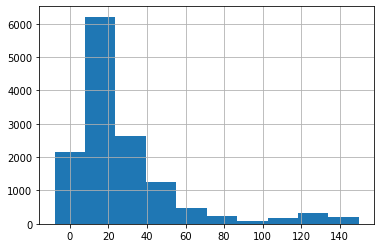

In [42]:
infection_df["Days_since_symptom_onset"].hist()

In [43]:
assert (
    infection_df[infection_df["Status"] == "Control"]["Days_since_symptom_onset"]
    .isna()
    .all()
)
assert (
    infection_df[infection_df["Status"].str.startswith("Variant infection")][
        "Days_since_symptom_onset"
    ]
    .isna()
    .all()
)

In [44]:
# map infection timepoints to global timepoint label
map_infection_to_global_timepoint_labels = {
    # infection data points with Days_since_symptom_onset N/A can be control samples
    "day 0 / pre-pandemic": infection_df[
        (infection_df["Status"] == "Control")
        & (infection_df["Days_since_symptom_onset"].isna())
    ],
    # exclude infection data points with Days_since_symptom_onset<= 0
    "day 7 / week 1": infection_df[
        (infection_df["Days_since_symptom_onset"] >= 0)
        & (infection_df["Days_since_symptom_onset"] <= 1 * 7)
    ],
    "day 21 / weeks 2&3": infection_df[
        (infection_df["Days_since_symptom_onset"] > 1 * 7)
        & (infection_df["Days_since_symptom_onset"] <= 3 * 7)
    ],
    "day 28 / week 4": infection_df[
        (infection_df["Days_since_symptom_onset"] > 3 * 7)
        & (infection_df["Days_since_symptom_onset"] <= 4 * 7)
    ],
    "day 42 / weeks 5&6": infection_df[
        (infection_df["Days_since_symptom_onset"] > 4 * 7)
        & (infection_df["Days_since_symptom_onset"] <= 6 * 7)
    ],
    "week 7 and later / 3 months": infection_df[
        infection_df["Days_since_symptom_onset"] > 6 * 7
    ],
}

for (
    associated_global_timepoint_label,
    df_partial,
) in map_infection_to_global_timepoint_labels.items():
    print(df_partial.shape, associated_global_timepoint_label)

(945, 13) day 0 / pre-pandemic
(2133, 13) day 7 / week 1
(5832, 13) day 21 / weeks 2&3
(1377, 13) day 28 / week 4
(1998, 13) day 42 / weeks 5&6
(2376, 13) week 7 and later / 3 months


In [45]:
# sanity check that every infection datapoint with a non-nan and >=0 timepoint is accounted for in these splits
assert (
    sum(
        [
            df_partial.shape[0]
            for df_partial in map_infection_to_global_timepoint_labels.values()
        ]
    )
    + infection_df[infection_df["Status"] != "Control"]["Days_since_symptom_onset"]
    .isna()
    .sum()
    + (
        infection_df[infection_df["Status"] != "Control"]["Days_since_symptom_onset"]
        < 0
    ).sum()
    == infection_df.shape[0]
)

day 0 / pre-pandemic
day 7 / week 1
day 21 / weeks 2&3
day 28 / week 4
day 42 / weeks 5&6


week 7 and later / 3 months


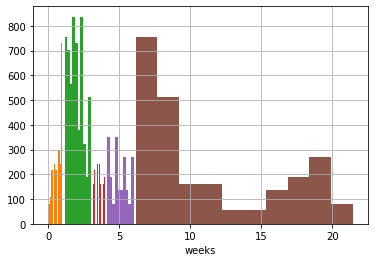

In [46]:
X_partial = []
var_partial = []
for (
    associated_global_timepoint_label,
    df_partial,
) in map_infection_to_global_timepoint_labels.items():
    print(associated_global_timepoint_label)
    infection_df_pivot, variable_info = process_infection_timepoint(
        df_partial, associated_global_timepoint_label
    )
    X_partial.append(infection_df_pivot)
    var_partial.append(variable_info)

infection_df_pivot = pd.concat(X_partial, axis=1)
variable_info = pd.concat(var_partial, axis=0)

In [47]:
# note: there are NaNs - patients don't have entries for all timepoints
infection_df_pivot

combined_name,Wuhan_S_Wuhan_IgG_day 0 / pre-pandemic,NL63_S_Wuhan_IgG_day 0 / pre-pandemic,Wuhan_N_Wuhan_IgG_day 0 / pre-pandemic,CoV1_S_Wuhan_IgG_day 0 / pre-pandemic,Wuhan_NTD_Wuhan_IgG_day 0 / pre-pandemic,HKU1_S_Wuhan_IgG_day 0 / pre-pandemic,OC43_S_Wuhan_IgG_day 0 / pre-pandemic,h229E_S_Wuhan_IgG_day 0 / pre-pandemic,Wuhan_RBD_Wuhan_IgG_day 0 / pre-pandemic,Wuhan_S_Wuhan_IgM_day 0 / pre-pandemic,...,Wuhan_RBD_Wuhan_IgM_week 7 and later / 3 months,Wuhan_S_Wuhan_IgA_week 7 and later / 3 months,NL63_S_Wuhan_IgA_week 7 and later / 3 months,Wuhan_N_Wuhan_IgA_week 7 and later / 3 months,CoV1_S_Wuhan_IgA_week 7 and later / 3 months,Wuhan_NTD_Wuhan_IgA_week 7 and later / 3 months,HKU1_S_Wuhan_IgA_week 7 and later / 3 months,OC43_S_Wuhan_IgA_week 7 and later / 3 months,h229E_S_Wuhan_IgA_week 7 and later / 3 months,Wuhan_RBD_Wuhan_IgA_week 7 and later / 3 months
Patient_ID,,,,,,,,,,,,,,,,,,,,,
Prepandemic,98.132214,3093.853643,265.864943,122.043486,6.4903,10984.460829,23886.742571,14908.013786,202.269914,153.080743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,172.943355,459.157000,476.44050,253.974500,299.141000,90.654500,586.65000,1526.34250,427.685000,317.379000
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1725.727532,13796.471000,1267.24700,21194.427750,1911.722750,3654.435500,3789.59375,16398.78725,422.236250,5614.089750
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1460.365660,5181.221250,710.91425,6285.110250,1361.355750,1115.888500,3922.28525,9396.52675,771.553250,2560.160000
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,47.603085,390.429750,2220.13725,147.992875,108.658625,57.647625,964.12775,2783.95125,790.480250,253.491750


In [48]:
variable_info

,virus,target,variant_plate_type,antibody,measurement_original_column_name,timepoint
combined_name,,,,,,
Wuhan_S_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,S,Wuhan,IgG,CoV2_S_IgG_Mean,day 0 / pre-pandemic
NL63_S_Wuhan_IgG_day 0 / pre-pandemic,NL63,S,Wuhan,IgG,NL63_S_IgG_Mean,day 0 / pre-pandemic
Wuhan_N_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,N,Wuhan,IgG,CoV2_N_IgG_Mean,day 0 / pre-pandemic
CoV1_S_Wuhan_IgG_day 0 / pre-pandemic,CoV1,S,Wuhan,IgG,CoV1_S_IgG_Mean,day 0 / pre-pandemic
Wuhan_NTD_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,NTD,Wuhan,IgG,CoV2_NTD_IgG_Mean,day 0 / pre-pandemic
...,...,...,...,...,...,...
Wuhan_NTD_Wuhan_IgA_week 7 and later / 3 months,Wuhan,NTD,Wuhan,IgA,CoV2_NTD_IgA_Mean,week 7 and later / 3 months
HKU1_S_Wuhan_IgA_week 7 and later / 3 months,HKU1,S,Wuhan,IgA,HKU1_S_IgA_Mean,week 7 and later / 3 months
OC43_S_Wuhan_IgA_week 7 and later / 3 months,OC43,S,Wuhan,IgA,OC43_S_IgA_Mean,week 7 and later / 3 months


In [49]:
# reorder participants info to match
infection_patient_status = infection_patient_status.loc[infection_df_pivot.index]
infection_patient_status

,Status,Death
Patient_ID,,
Prepandemic,Control,NaN
114,Admit,0.0
118,Admit,0.0
12,Outpatient,0.0
121,Admit,1.0
...,...,...
84,ICU,0.0
87,ICU,0.0
101,Admit,0.0


In [50]:
infection_patient_status.columns

Index(['Status', 'Death'], dtype='object')

In [51]:
adata_infection = anndata.AnnData(
    X=infection_df_pivot, obs=infection_patient_status, var=variable_info
)
adata_infection

AnnData object with n_obs × n_vars = 100 × 162
    obs: 'Status', 'Death'
    var: 'virus', 'target', 'variant_plate_type', 'antibody', 'measurement_original_column_name', 'timepoint'

In [52]:
adata_infection.var

,virus,target,variant_plate_type,antibody,measurement_original_column_name,timepoint
combined_name,,,,,,
Wuhan_S_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,S,Wuhan,IgG,CoV2_S_IgG_Mean,day 0 / pre-pandemic
NL63_S_Wuhan_IgG_day 0 / pre-pandemic,NL63,S,Wuhan,IgG,NL63_S_IgG_Mean,day 0 / pre-pandemic
Wuhan_N_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,N,Wuhan,IgG,CoV2_N_IgG_Mean,day 0 / pre-pandemic
CoV1_S_Wuhan_IgG_day 0 / pre-pandemic,CoV1,S,Wuhan,IgG,CoV1_S_IgG_Mean,day 0 / pre-pandemic
Wuhan_NTD_Wuhan_IgG_day 0 / pre-pandemic,Wuhan,NTD,Wuhan,IgG,CoV2_NTD_IgG_Mean,day 0 / pre-pandemic
...,...,...,...,...,...,...
Wuhan_NTD_Wuhan_IgA_week 7 and later / 3 months,Wuhan,NTD,Wuhan,IgA,CoV2_NTD_IgA_Mean,week 7 and later / 3 months
HKU1_S_Wuhan_IgA_week 7 and later / 3 months,HKU1,S,Wuhan,IgA,HKU1_S_IgA_Mean,week 7 and later / 3 months
OC43_S_Wuhan_IgA_week 7 and later / 3 months,OC43,S,Wuhan,IgA,OC43_S_IgA_Mean,week 7 and later / 3 months


In [53]:
adata_infection.obs["Status"].value_counts()

Admit         40
ICU           35
Outpatient    24
Control        1
Name: Status, dtype: int64

In [54]:
# Remove "Control"

In [55]:
adata_infection = adata_infection[adata_infection.obs["Status"] != "Control"]

In [56]:
adata_infection.obs["Status"].value_counts()

Admit         40
ICU           35
Outpatient    24
Name: Status, dtype: int64

In [57]:
adata_infection.write(f"{config.paths.generated_data_dir}/partial.infection_cohort1.h5")

/users/maximz/anaconda3/envs/serology-env/lib/python3.7/site-packages/anndata/_core/anndata.py:1237: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.


... storing 'Status' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'virus' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'target' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'variant_plate_type' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'antibody' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'measurement_original_column_name' as categorical


Trying to set attribute `.var` of view, copying.


... storing 'timepoint' as categorical
